In [16]:
#Importación de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Definición de los parámetros de los gráficos
plt.rcParams.update({'font.size': 11, 'figure.figsize': (8, 6)}) 

#Lectura del DataSet de entrenamiento
data_df = pd.read_csv('./datos-limpios.csv',encoding="latin-1")

#Impresión de los Resultados
data_df.head(10)

El tamaño del arreglo de entrada (X) es: (51470, 20)
El tamaño del arreglo de salida (y) es: (51470, 1)


In [2]:
#Cambio de un DataFrame de Pandas a un arreglo de Numpy
X = data_df.iloc[:,:20].values
y = data_df.iloc[:,20:21].values

print("El tamaño del arreglo de entrada (X) es:", X.shape)
print("El tamaño del arreglo de salida (y) es:", y.shape)

El tamaño del arreglo de entrada (X) es: (51470, 20)
El tamaño del arreglo de salida (y) es: (51470, 1)


In [18]:
# Importación de librerías
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np

# Ejemplo de datos de entrada (X) y salida (y)
# Asegúrate de que X e y sean arrays NumPy y que X contenga solo valores numéricos
X = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]])
y = np.array([0, 1, 0])

# Normalización de los Datos de Entrada
scaler = StandardScaler()
X = scaler.fit_transform(X)
print('Datos de entrada (X) Normalizados: \n', X)

# Categorización de los Datos de Salida
ohe = OneHotEncoder(categories='auto')
y = ohe.fit_transform(y.reshape(-1, 1)).toarray()
print('\nDatos de salida (y) Categorizados: \n', y)

# Extracción de arreglos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Revisión de los tamaños de los arreglos
print("\nEl tamaño del arreglo de entrada normalizado (X) es:", X.shape)
print("El tamaño del arreglo de salida categorizado (y) es:", y.shape)
print("El tamaño del arreglo de entrada (X) para entrenamiento es:", X_train.shape)
print("El tamaño del arreglo de entrada (X) para prueba es:", X_test.shape)
print("El tamaño del arreglo de salida (y) para entrenamiento es:", y_train.shape)
print("El tamaño del arreglo de salida (y) para prueba es:", y_test.shape)


Datos de entrada (X) Normalizados: 
 [[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]

Datos de salida (y) Categorizados: 
 [[1. 0.]
 [0. 1.]
 [1. 0.]]

El tamaño del arreglo de entrada normalizado (X) es: (3, 3)
El tamaño del arreglo de salida categorizado (y) es: (3, 2)
El tamaño del arreglo de entrada (X) para entrenamiento es: (2, 3)
El tamaño del arreglo de entrada (X) para prueba es: (1, 3)
El tamaño del arreglo de salida (y) para entrenamiento es: (2, 2)
El tamaño del arreglo de salida (y) para prueba es: (1, 2)


In [19]:
#Importación de la Librería TensorBoard
from tensorflow.keras.callbacks import TensorBoard
import os

#Definir el directorio de registro para TensorBoard
log_dir = "./logs/fit/"
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

#Crear el llamado (callback) de eventos para TensorBoard
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [22]:
# Importación de la Librería TensorBoard
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import os
import numpy as np

# Ejemplo de datos de entrada (X_train, X_test) y salida (y_train, y_test)
# Asegúrate de que X_train y X_test tengan la forma correcta
X_train = np.random.rand(100, 20)  # 100 muestras, 20 características
X_test = np.random.rand(10, 20)    # 10 muestras, 20 características
y_train = np.random.randint(0, 2, size=(100, 3))  # 100 muestras, 3 clases
y_test = np.random.randint(0, 2, size=(10, 3))    # 10 muestras, 3 clases

# Definir el directorio de registro para TensorBoard
log_dir = "./logs/fit/"
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# Crear el llamado (callback) de eventos para TensorBoard
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Definición del modelo con input_shape ajustado
model = Sequential([
    Dense(64, activation='relu', input_shape=(20,)),  # Ajusta el tamaño de entrada a 20
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')  # Salida según las clases en y_train
])

# Compilación del modelo
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(x=X_train, 
                    y=y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=100, 
                    batch_size=64, 
                    callbacks=[tensorboard_callback],  # Habilitar TensorBoard
                    verbose=1)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.3331 - loss: 1.7791 - val_accuracy: 0.5000 - val_loss: 1.8048
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.3502 - loss: 1.7490 - val_accuracy: 0.5000 - val_loss: 1.7864
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.3887 - loss: 1.7574 - val_accuracy: 0.4000 - val_loss: 1.7737
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.4354 - loss: 1.7344 - val_accuracy: 0.4000 - val_loss: 1.7641
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.4629 - loss: 1.7242 - val_accuracy: 0.4000 - val_loss: 1.7586
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.4235 - loss: 1.6991 - val_accuracy: 0.3000 - val_loss: 1.7547
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.4919 - loss: 1.7238 - val_accuracy: 0.2000 - val_loss: 1.7503
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.4815 - loss: 1.7280 - val_accuracy: 0.2000 - val_

In [23]:
#Visualización de la Red Neuronal
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,571 (41.30 KB)

 Trainable params: 3,523 (13.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,048 (27.54 KB)

In [24]:
#Configuración del modelo de entrenamiento
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

#Importación de la Librería TensorBoard
from tensorflow.keras.callbacks import TensorBoard
import os

#Definir el directorio de registro para TensorBoard
log_dir = "./logs/fit/"
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

#Crear el llamado (callback) de eventos para TensorBoard
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [25]:
#Predicciones de la salida en base a los datos de prueba de entrada
y_pred = model.predict(X_test)

#Conversión de las predicciones a etiquetas
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
print('Primeras predicciones de la Salida: \n', pred[0:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Primeras predicciones de la Salida: 
 [np.int64(2), np.int64(1), np.int64(0), np.int64(2), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1)]


In [26]:
#Conversión de "hot encoded test label" a "label"
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))
print('Primeras etiquetas de la Salida: \n', test[0:10])

Primeras etiquetas de la Salida: 
 [np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(2), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1)]


In [27]:
#Importación de librerías
from sklearn.metrics import accuracy_score

#Se determina el nivel de asertividad (accuracy)
a = accuracy_score(pred,test)
print('El nivel de certeza (accuracy) es:', a*100, "%")

El nivel de certeza (accuracy) es: 50.0 %


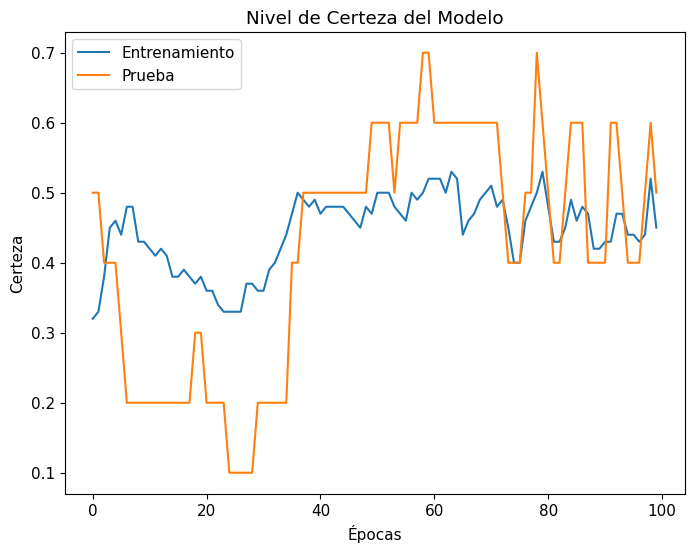

In [28]:
#Resumen del entrenamiento por medio de la asertividad (accuracy)
plt.plot(history.history['accuracy']) #Representa la precisión en el conjunto de entrenamiento.
plt.plot(history.history['val_accuracy']) #Representa la precisión en el conjunto de validación
plt.title('Nivel de Certeza del Modelo')
plt.ylabel('Certeza')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento', 'Prueba'], loc='best')
plt.show();

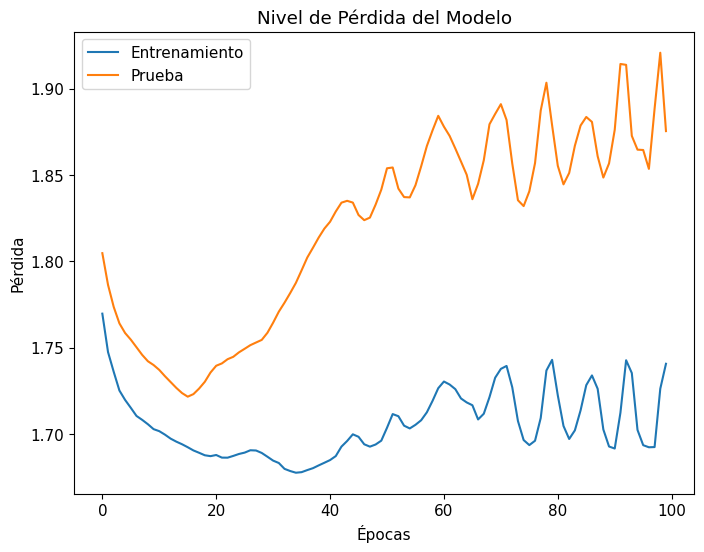

In [29]:
#Resumen del entrenamiento por medio de la pérdida (loss)
plt.plot(history.history['loss']) #Indica qué tan bien o mal el modelo se está ajustando a los datos de entrenamiento. 
plt.plot(history.history['val_loss']) # permite evaluar qué tan bien el modelo se generaliza a datos no vistos (el conjunto de validación).
plt.title('Nivel de Pérdida del Modelo')
plt.ylabel('Pérdida')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento', 'Prueba'], loc='best')
plt.show();

In [30]:
#Definición del Arreglo con los Valores
arreglo = np.array([[1500, 1,  2.5, 0, 10, 1, 256, 1, 200, 8, 15, 1880, 1495, 64, 15, 6, 20, 1, 1, 1]])

#Normalización de los Datos de Entrada
arreglo = scaler.fit_transform(arreglo)

#Predicciones de la Salida en base a los datos
mo_pred = model.predict(arreglo)

#Conversión de las Predicciones a Etiquetas
predic = list()
for i in range(len(mo_pred)):
    predic.append(np.argmax(mo_pred[i]))

#Impresión de los Resultados    
print("La predicción del costo para las caraterísticas indicadas es: Categoría número", predic)

#Extensión del Notebook de TensorBoard
%load_ext tensorboard

#Inicialización de TensorBoard en el Notebook
%tensorboard --logdir logs/fit

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
La predicción del costo para las caraterísticas indicadas es: Categoría número [np.int64(0)]
